# FITS

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pprint
import random

In [ ]:
fits_file = '/content/drive/MyDrive/Project Master\'s Degree/hst_10190_13_acs_wfc_f814w_sci.fits'

In [ ]:
hdu_list = fits.open(fits_file)
hdu_list.info()
# hdu_list.close()

Filename: /content/drive/MyDrive/Project Master's Degree/hst_10190_13_acs_wfc_f814w_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     789   ()      
  1  SCI           1 ImageHDU        86   (4973, 4947)   float32   


In [ ]:
image_data = hdu_list[1].data

In [ ]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 0.0
Max: 78.18604
Mean: 0.18353963
Stdev: 0.54749435


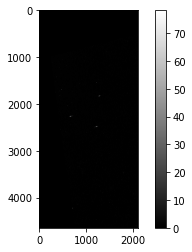

In [ ]:
plt.imshow(image_data[0:4644, 0:2112], cmap='gray')
plt.colorbar()

In [ ]:
hdu_list[1].header[10]

'ELECTRONS/S'

In [ ]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(4947, 4973)


In [ ]:
image_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
image_data.shape

(4947, 4973)

In [ ]:
print(image_data[0])
print(image_data[0].shape )

[0. 0. 0. ... 0. 0. 0.]
(4973,)


In [ ]:
np.max(image_data[0:4000, 0:500])

74.66911

In [ ]:
pprint.pprint(image_data[4000:4005, 50:550])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)


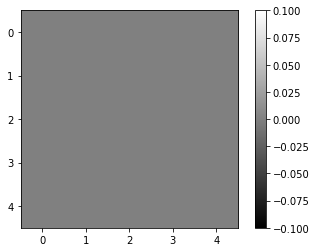

In [ ]:
plt.imshow(image_data[50:55, 50:55], cmap='gray')
plt.colorbar()

In [ ]:
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

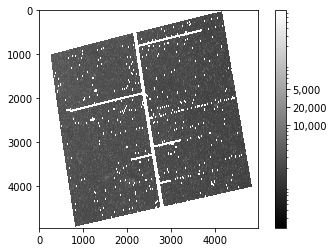

In [ ]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[4,1,2])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

# CAT (TXT)

In [ ]:
fits_file = '/content/drive/MyDrive/Project Master\'s Degree/hst_10190_13_acs_wfc_f814w_sexphot_trm.txt'

In [ ]:
lines = []
# with open("/content/drive/MyDrive/โปรเจค491&499/lib_txt/i14.txt", "r") as f: 
# actually we can use cat file suddenly
with open(fits_file, "r") as f:
    lines = f.readlines()
    lines.append(lines)
lines = lines.pop(-1)

In [ ]:
lines[5:30]

['#     Telescope European Coordinating Facility (ST-ECF/ESA) and the Canadian\n',
 '#     Astronomy Data Centre (CADC/NRC/CSA).\n',
 '#\n',
 '# One copy of each paper resulting from data obtained from the HLA should be sent to the STScI\n',
 '# ---------------------------------------------------------------------------------------------------------\n',
 '# Proposal ID    :      10190\n',
 '# Image File Name:                                              hst_10190_13_acs_wfc_f814w_drz.fits\n',
 '# Target Name    : ANY                                                                             \n',
 '# Date Observed  : 2004-12-28          \n',
 '# Time Observed  : 08:53:10            \n',
 '# Instrument     : ACS     \n',
 '# Detector       : ACS/WFC \n',
 '# Target RA      :    23.364584\n',
 '# Target DEC     :    30.654265\n',
 '# Orientation    :        0.000\n',
 '# Aperture RA    :    23.364584\n',
 '# Aperture DEC   :    30.654265\n',
 '# Aperture PA    :       76.480\n',
 '# Expo

In [ ]:
# keep only data
data_list = []
for i in lines:
  if i[0] == '#' or i[0] == '-':
    pass
  else:
    data_list.append(i.split())

In [ ]:
RA_DEC_list = []
for i in data_list:
  RA_DEC_list.append([(float(i[2])), (float(i[3]))])
  # position_list.append([float(i[2])])
# position_list

In [ ]:
RA_DEC_list[0:10]
# RA, DEC

[[23.3270772, 30.6752882],
 [23.3271479, 30.6754031],
 [23.3272465, 30.6748994],
 [23.3272607, 30.6747796],
 [23.3273281, 30.6746041],
 [23.3273286, 30.6748319],
 [23.3273367, 30.6742281],
 [23.3273787, 30.6743401],
 [23.3273808, 30.6741022],
 [23.327433, 30.6741792]]

In [ ]:
X_Y_list = []
for i in data_list:
  X_Y_list.append([round(float(i[0])), round(float(i[1]))])
  # position_list.append([float(i[2])])
X_Y_list[0:10]

[[4842, 4007],
 [4837, 4015],
 [4831, 3979],
 [4830, 3970],
 [4826, 3958],
 [4826, 3974],
 [4826, 3931],
 [4823, 3939],
 [4823, 3922],
 [4820, 3927]]

## FHWM analysis

In [ ]:
text_ = """ # X-Center    Y-Center         RA         DEC        ID     TotMag     MagErr       CI    Flags     MagAp1     MagErr    FluxAp1    FluxErr     MagAp2     MagErr    FluxAp2    FluxErr        Bck    Flags        pix        deg     MagIso     MagErr    FluxIso    FluxErr  MagIsoCor     MagErr FluxIsoCor    FluxErr   Radius    MagAuto     MagErr   FluxAuto    FluxErr    MagBest     MagErr   FluxBest    FluxErr     counts        Mag     counts        Mag          0          1          2          3          4          5          6          7       Xmin       Ymin       Xmax       Ymax         X2      ErrX2         Y2      ErrY2         XY      ErrXY        CXX     ErrCXX        CYY     ErrCYY        CXY     ErrCXY        A     ErrA        B     ErrB    Theta  ErrTheta    FWHM             X             Y            X2         ErrX2            Y2         ErrY2            XY         ErrXY           CXX        ErrCXX           CYY        ErrCYY           CXY        ErrCXY             A          ErrA             B          ErrB    Theta ErrTheta     FWHM    Elong    Ellip    Theta ErrTheta          RA         DEC    Theta ErrTheta          RA         DEC    Theta ErrTheta Star/Gal                                                                                                                                                                                                                                                                                         
#       c1          c2         c3          c4        c5         c6         c7       c8       c9        c10        c11        c12        c13        c14        c15        c16        c17        c18      c19        c20        c21        c22        c23        c24        c25        c26        c27        c28        c29      c30        c31        c32        c33        c34        c35        c36        c37        c38        c39        c40        c41        c42        c43        c44        c45        c46        c47        c48        c49        c50        c51        c52        c53        c54        c55        c56        c57        c58        c59        c60        c61        c62        c63        c64        c65        c66      c67      c68      c69      c70      c71      c72      c73           c74           c75           c76           c77           c78           c79           c80           c81           c82           c83           c84           c85           c86           c87           c88           c89           c90           c91      c92      c93      c94      c95      c96      c97      c98         c99        c100     c101     c102        c103        c104     c105     c106     c107       c108       c109       c110       c111       c112       c113       c114       c115       c116       c117       c118       c119       c120       c121       c122       c123       c124       c125       c126       c127       c128       c129       c130       c131       c132       
"""

In [ ]:
text_ = text_.strip()

In [ ]:
text_ = text_.replace('#', "")
# text_.replace(' ', "")

In [ ]:
text_ = text_.split()

In [ ]:
print(text_)

['X-Center', 'Y-Center', 'RA', 'DEC', 'ID', 'TotMag', 'MagErr', 'CI', 'Flags', 'MagAp1', 'MagErr', 'FluxAp1', 'FluxErr', 'MagAp2', 'MagErr', 'FluxAp2', 'FluxErr', 'Bck', 'Flags', 'pix', 'deg', 'MagIso', 'MagErr', 'FluxIso', 'FluxErr', 'MagIsoCor', 'MagErr', 'FluxIsoCor', 'FluxErr', 'Radius', 'MagAuto', 'MagErr', 'FluxAuto', 'FluxErr', 'MagBest', 'MagErr', 'FluxBest', 'FluxErr', 'counts', 'Mag', 'counts', 'Mag', '0', '1', '2', '3', '4', '5', '6', '7', 'Xmin', 'Ymin', 'Xmax', 'Ymax', 'X2', 'ErrX2', 'Y2', 'ErrY2', 'XY', 'ErrXY', 'CXX', 'ErrCXX', 'CYY', 'ErrCYY', 'CXY', 'ErrCXY', 'A', 'ErrA', 'B', 'ErrB', 'Theta', 'ErrTheta', 'FWHM', 'X', 'Y', 'X2', 'ErrX2', 'Y2', 'ErrY2', 'XY', 'ErrXY', 'CXX', 'ErrCXX', 'CYY', 'ErrCYY', 'CXY', 'ErrCXY', 'A', 'ErrA', 'B', 'ErrB', 'Theta', 'ErrTheta', 'FWHM', 'Elong', 'Ellip', 'Theta', 'ErrTheta', 'RA', 'DEC', 'Theta', 'ErrTheta', 'RA', 'DEC', 'Theta', 'ErrTheta', 'Star/Gal', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 

In [ ]:
print('RA : {}, DEC : {}\nFWHM : {}'.format(text_.index('RA'), text_.index('DEC'), text_.index('FWHM')))

RA : 2, DEC : 3
FWHM : 72


In [ ]:
FWHM_list = []
for i in data_list:
  FWHM_list.append(float(i[72]))
# position_list

In [ ]:
FWHM_list[:10]

[1.79, 0.0, 3.33, 4.43, 0.0, 6.47, 3.04, 0.53, 3.63, 5.1]

In [ ]:
FWHM_arr = np.array(FWHM_list)
print('Min:', np.min(FWHM_arr))
print('Max:', np.max(FWHM_arr))
print('Mean:', np.mean(FWHM_arr))
print('Stdev:', np.std(FWHM_arr))

Min: -33.2
Max: 16.3
Mean: 3.508710980949
Stdev: 2.3974295452043113


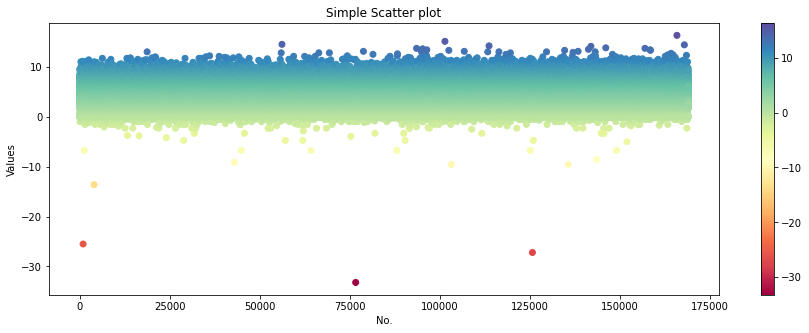

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(range(len(FWHM_arr)), FWHM_arr, c=FWHM_arr, cmap='Spectral')
plt.colorbar()
plt.title('Simple Scatter plot')
plt.xlabel('No.')
plt.ylabel('Values')
plt.show()

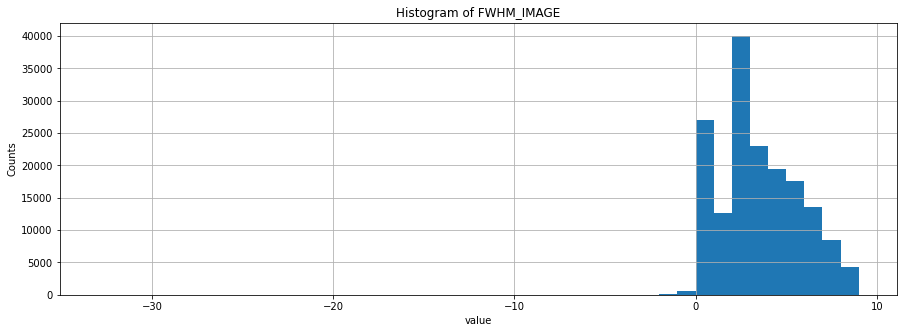

In [ ]:
plt.hist(FWHM_arr, bins=range(int(min(FWHM_arr)), 10))
plt.title('Histogram of FWHM_IMAGE')
plt.xlabel('value')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

#Extraction

In [ ]:
def plot_(index_, crop_size_x = 30, crop_size_y = 30):
  pos_x = X_Y_list[index_][0]
  pos_y = X_Y_list[index_][1]

  if (crop_size_x * crop_size_x) % 2 != 0: # odd number of size
    rad_x = crop_size_x // 2
    rad_y = crop_size_y // 2

    start_x = pos_x-rad_x
    end_x = pos_x+rad_x + 1

    start_y = pos_y-rad_y
    end_y = pos_y+rad_y + 1
  else: # even number of size
    rad_x = crop_size_x // 2
    rad_y = crop_size_y // 2

    start_x = pos_x-rad_x
    end_x = pos_x+rad_x

    start_y = pos_y-rad_y
    end_y = pos_y+rad_y
  
  border_range = image_data[start_y:end_y, start_x:end_x]
  return border_range

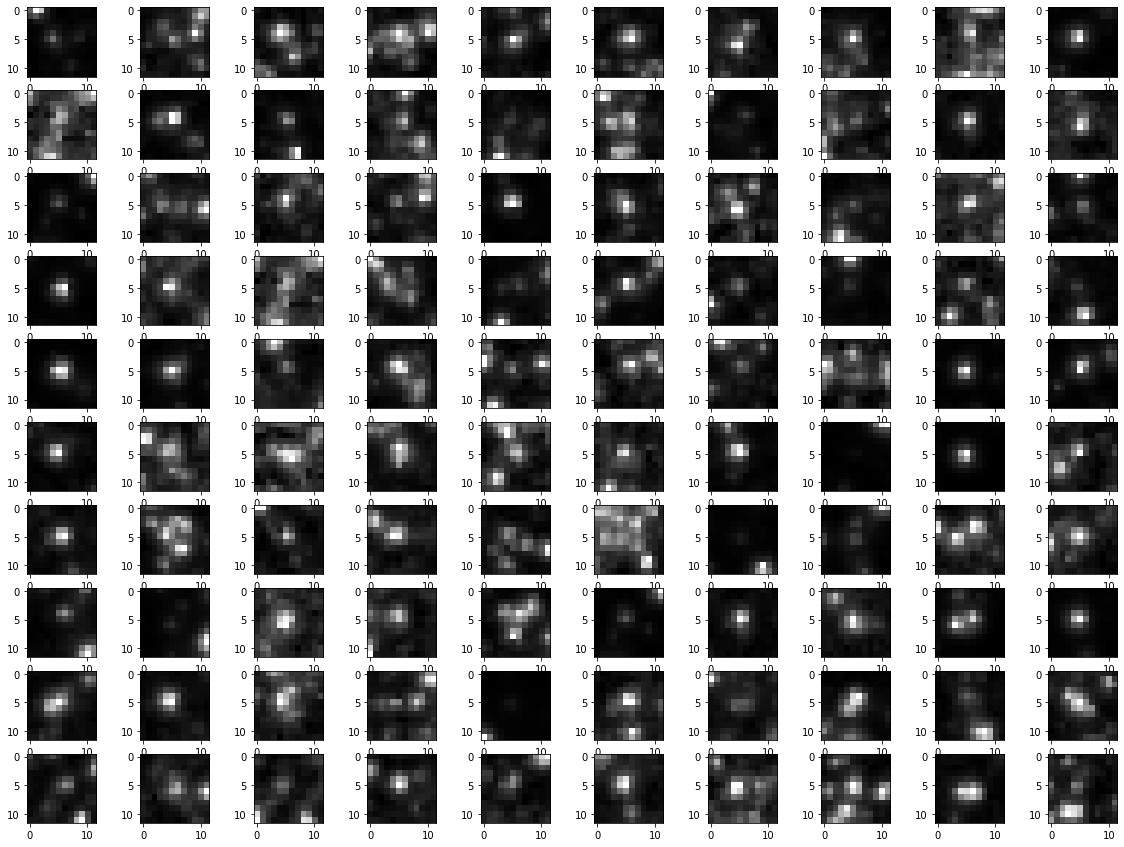

In [ ]:
row = 10
col = 10
plt.figure(figsize=(20, 15))
for i in range((row * col)):
  ran_index = random.randint(0,1000)
  border_range = plot_(ran_index, crop_size_x = 12, crop_size_y = 12)
  plt.subplot(row, col, i+1)
  plt.imshow(border_range, cmap='gray')
plt.show()

# get lables for mathing index of items

In [ ]:
import pandas as pd

In [ ]:
txt = '1.Unknown'
print(txt.split('.'))

['1', 'Unknown']


In [ ]:
obj = []
with open('dec.txt') as f:
   for line in f:
       # For Python3, use print(line)
      #  print(line)
      print(line.split())
      # split_list = line.split()
      obj.append(line.split())

In [ ]:
print(obj)

[['1', '01', '32', '31.97', '30', '37', '37.5', 'Unknown', 'CS', 'U92'], ['2', '01', '32', '33.36', '30', '26', '20.9', 'Stellar', 'CS', 'H39'], ['3', '01', '32', '34.40', '30', '37', '42.6', '19.86', '1.13', 'Cluster', 'CBF', '143'], ['4', '01', '32', '35.60', '30', '41', '28.0', 'Unknown', 'CS', 'H22'], ['5', '01', '32', '38.87', '30', '47', '07.1', 'Galaxy', 'CS', 'U33'], ['6', '01', '32', '38.97', '30', '39', '17.9', '19.92', '10.28', 'Cluster', 'CBF', '162;', 'Ma', '2002b'], ['7', '01', '32', '39.13', '30', '40', '42.0', 'Unknown', 'CS', 'U81'], ['8', '01', '32', '41.27', '30', '27', '51.9', 'Unknown', 'CS', 'U141'], ['9', '01', '32', '42.93', '30', '35', '38.6', '17.61', '0.32', '8.56', '4.63', 'Cluster', 'CS', 'U106;', 'Hilt', 'L;', 'MD', '1;', 'Ma', '2002a;', 'Ma', '2004b'], ['10', '01', '32', '44.30', '30', '40', '12.4', '18.75', '10.28', '5.58', 'Cluster', 'CBF', '161;', 'CS', 'U88;', 'Ma', '2002b;', 'Ma', '2004a'], ['11', '01', '32', '45.31', '30', '30', '24.3', 'Unknown', '

In [ ]:
labeled = []
counter = 1
for i in obj:
  for j in i:
    if j in ['Unknown', 'Stellar', 'Cluster', 'Galaxy', 'Chip']:
      labeled.append('{' + str(counter) + '.' + j + '}')
  counter += 1

In [ ]:
print(labeled)

['{1.Unknown}', '{2.Stellar}', '{3.Cluster}', '{4.Unknown}', '{5.Galaxy}', '{6.Cluster}', '{7.Unknown}', '{8.Unknown}', '{9.Cluster}', '{10.Cluster}', '{11.Unknown}', '{12.Stellar}', '{13.Stellar}', '{14.Stellar}', '{15.Cluster}', '{16.Cluster}', '{17.Unknown}', '{18.Unknown}', '{19.Stellar}', '{20.Unknown}', '{21.Unknown}', '{22.Unknown}', '{23.Cluster}', '{24.Stellar}', '{25.Stellar}', '{26.Cluster}', '{27.Stellar}', '{28.Cluster}', '{29.Cluster}', '{30.Unknown}', '{31.Unknown}', '{32.Cluster}', '{33.Unknown}', '{34.Cluster}', '{35.Cluster}', '{36.Unknown}', '{37.Unknown}', '{38.Unknown}', '{39.Stellar}', '{40.Cluster}', '{41.Cluster}', '{42.Cluster}', '{43.Galaxy}', '{44.Cluster}', '{45.Cluster}', '{46.Cluster}', '{47.Cluster}', '{48.Unknown}', '{49.Cluster}', '{50.Galaxy}', '{51.Unknown}', '{52.Cluster}', '{53.Cluster}', '{54.Cluster}', '{55.Unknown}', '{56.Unknown}', '{57.Galaxy}', '{58.Unknown}', '{59.Unknown}', '{60.Stellar}', '{61.Unknown}', '{62.Stellar}', '{63.Unknown}', '{64

# keep dec ac

In [ ]:
import pandas as pd

In [ ]:
obj_ = []
with open('dec.txt') as f:
   for line in f:
       # For Python3, use print(line)
      #  print(line)
      # print(line.split())
      split_list = line.split()
      obj_.append(split_list[:7])

In [ ]:
z = []
x =['01', '32', '31.97']
y = ['30', '37', '37.5']
print((x[0] + ':' + x[1]))

01:32


In [ ]:
print(obj_[0][1:4])
print(obj_[0][4:])

['01', '32', '31.97']
['30', '37', '37.5']


In [ ]:
merge_list = []
for i in obj_:
  temp_ = []
  
  str_1 = i[1] + ':' + i[2] + ':' + i[3]
  str_2 = i[4] + ':' + i[5] + ':' + i[6]
  
  temp_.append(i[0])
  temp_.append(str_1)
  temp_.append(str_2)
  merge_list.append(temp_)
  

In [ ]:
merge_list

[['1', '01:32:31.97', '30:37:37.5'],
 ['2', '01:32:33.36', '30:26:20.9'],
 ['3', '01:32:34.40', '30:37:42.6'],
 ['4', '01:32:35.60', '30:41:28.0'],
 ['5', '01:32:38.87', '30:47:07.1'],
 ['6', '01:32:38.97', '30:39:17.9'],
 ['7', '01:32:39.13', '30:40:42.0'],
 ['8', '01:32:41.27', '30:27:51.9'],
 ['9', '01:32:42.93', '30:35:38.6'],
 ['10', '01:32:44.30', '30:40:12.4'],
 ['11', '01:32:45.31', '30:30:24.3'],
 ['12', '01:32:46.80', '30:33:35.3'],
 ['13', '01:32:51.77', '30:33:05.3'],
 ['14', '01:32:51.78', '30:29:47.8'],
 ['15', '01:32:51.82', '30:29:36.4'],
 ['16', '01:32:52.65', '30:14:30.9'],
 ['17', '01:32:52.70', '30:32:00.4'],
 ['18', '01:32:52.87', '30:34:10.2'],
 ['19', '01:32:53.80', '30:37:52.9'],
 ['20', '01:32:54.31', '30:55:29.5'],
 ['21', '01:32:54.63', '30:23:20.6'],
 ['22', '01:32:54.95', '30:46:25.4'],
 ['23', '01:32:55.47', '30:29:22.2'],
 ['24', '01:32:56.09', '30:38:25.7'],
 ['25', '01:32:56.18', '30:25:45.8'],
 ['26', '01:32:56.32', '30:14:58.9'],
 ['27', '01:32:56.36'

In [ ]:
df3 = pd.DataFrame(merge_list)

In [ ]:
df3

,0,1,2
0,1,01:32:31.97,30:37:37.5
1,2,01:32:33.36,30:26:20.9
2,3,01:32:34.40,30:37:42.6
3,4,01:32:35.60,30:41:28.0
4,5,01:32:38.87,30:47:07.1
...,...,...,...
446,447,01:35:04.69,30:46:10.6
447,448,01:35:14.01,30:52:32.9
448,449,01:35:18.25,30:49:53.9
449,450,01:35:45.70,30:26:51.4


In [ ]:
# df3.to_excel("output.xlsx")

In [ ]:
merge_list[0:2]

[['1', '01:32:31.97', '30:37:37.5'], ['2', '01:32:33.36', '30:26:20.9']]

In [ ]:
st1 = ['01:32:31.97', '01:35:04.69', '01:36:05.40']
st2 = ['30:46:10.6', '30:49:53.9', '30:58:19.7']

In [ ]:
for i in range(len(st1)):
  # new_str = (st1[i], ',', st2[i], 'radious')
  # new_str = 'circle({},{},5.160)'.format(st1[i], st2[i])
  new_str = 'Box({},{},100,100) # text={}'.format(st1[i], st2[i], labeled[i])

In [ ]:
new_str

'Box(01:36:05.40,30:58:19.7,100,100) # text={3.Cluster}'

In [ ]:
region_list = []

In [ ]:
pointer = 0
for i in merge_list:
  # temp_ = 'circle({},{},5.160")'.format(i[1], i[2])
  temp_ = 'Box({},{},100,100) # text={}'.format(i[1], i[2], labeled[pointer])
  region_list.append(temp_)
  pointer += 1

In [ ]:
len(region_list)

451

In [ ]:
my_df = pd.DataFrame(region_list)

In [ ]:
my_df

,0
0,"Box(01:32:31.97,30:37:37.5,100,100) # text={1...."
1,"Box(01:32:33.36,30:26:20.9,100,100) # text={2...."
2,"Box(01:32:34.40,30:37:42.6,100,100) # text={3...."
3,"Box(01:32:35.60,30:41:28.0,100,100) # text={4...."
4,"Box(01:32:38.87,30:47:07.1,100,100) # text={5...."
...,...
446,"Box(01:35:04.69,30:46:10.6,100,100) # text={44..."
447,"Box(01:35:14.01,30:52:32.9,100,100) # text={44..."
448,"Box(01:35:18.25,30:49:53.9,100,100) # text={44..."
449,"Box(01:35:45.70,30:26:51.4,100,100) # text={45..."


In [ ]:
my_df.to_csv('Box_regions.csv', index=False, header=False)

In [ ]:
# circle(1:34:30.2467,+30:38:13.002,5.160")
# circle(1:34:28.0279,+30:38:33.127,5.160")
# circle(1:34:27.9879,+30:38:13.520,5.160")